# Build a 2 layers auto-encoder with TensorFlow to compress images

https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/autoencoder.py

In [1]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# Training Parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)


In [3]:
# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}


In [4]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2


In [5]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


Step 1: Minibatch Loss: 0.445425
Step 1000: Minibatch Loss: 0.136238
Step 2000: Minibatch Loss: 0.114862
Step 3000: Minibatch Loss: 0.106333
Step 4000: Minibatch Loss: 0.105474
Step 5000: Minibatch Loss: 0.096484
Step 6000: Minibatch Loss: 0.095112
Step 7000: Minibatch Loss: 0.084740
Step 8000: Minibatch Loss: 0.082385
Step 9000: Minibatch Loss: 0.080270
Step 10000: Minibatch Loss: 0.078503
Step 11000: Minibatch Loss: 0.074766
Step 12000: Minibatch Loss: 0.074962
Step 13000: Minibatch Loss: 0.069604
Step 14000: Minibatch Loss: 0.069399
Step 15000: Minibatch Loss: 0.065213
Step 16000: Minibatch Loss: 0.065701
Step 17000: Minibatch Loss: 0.066797
Step 18000: Minibatch Loss: 0.065628
Step 19000: Minibatch Loss: 0.061628
Step 20000: Minibatch Loss: 0.060504
Step 21000: Minibatch Loss: 0.060192
Step 22000: Minibatch Loss: 0.057630
Step 23000: Minibatch Loss: 0.057437
Step 24000: Minibatch Loss: 0.059339
Step 25000: Minibatch Loss: 0.054372
Step 26000: Minibatch Loss: 0.052466
Step 27000: Mi

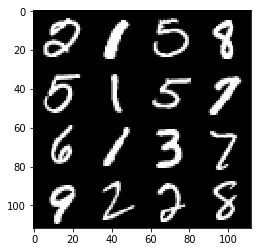

Reconstructed Images


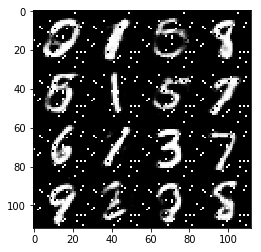

In [6]:
# Start Training
# Start a new TF session
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training
    for i in range(1, num_steps+1):
        # Prepare Data
        # Get the next batch of MNIST data (only images are needed, not labels)
        batch_x, _ = mnist.train.next_batch(batch_size)

        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
        # Display logs per step
        if i % display_step == 0 or i == 1:
            print('Step %i: Minibatch Loss: %f' % (i, l))

    # Testing
    # Encode and decode images from test set and visualize their reconstruction.
    n = 4
    canvas_orig = np.empty((28 * n, 28 * n))
    canvas_recon = np.empty((28 * n, 28 * n))
    for i in range(n):
        # MNIST test set
        batch_x, _ = mnist.test.next_batch(n)
        # Encode and decode the digit image
        g = sess.run(decoder_op, feed_dict={X: batch_x})

        # Display original images
        for j in range(n):
            # Draw the original digits
            canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                batch_x[j].reshape([28, 28])
        # Display reconstructed images
        for j in range(n):
            # Draw the reconstructed digits
            canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                g[j].reshape([28, 28])

    print("Original Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_orig, origin="upper", cmap="gray")
    plt.show()

    print("Reconstructed Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_recon, origin="upper", cmap="gray")
    plt.show()

# Simplest Auto-encoder in Keras

https://blog.keras.io/building-autoencoders-in-keras.html

In [7]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


In [8]:
#Let's also create a separate encoder model:

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [9]:
#Lst's also create a decoder model:

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [10]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [11]:
from keras.datasets import mnist
import numpy as np
import os
(x_train, y_train), (x_test, y_test) = mnist.load_data(path=os.getcwd()+"/mnist.npz")

In [13]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [14]:
autoencoder.fit(x_train, x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.3587 - val_loss: 0.2703
Epoch 2/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.2626 - val_loss: 0.2510
Epoch 3/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.2404 - val_loss: 0.2276
Epoch 4/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.2200 - val_loss: 0.2099
Epoch 5/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.2051 - val_loss: 0.1975
Epoch 6/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.1945 - val_loss: 0.1885
Epoch 7/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.1865 - val_loss: 0.1816
Epoch 8/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.1798 - val_loss: 0.1753
Epoch 9/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.1739 - val_loss: 0.1699
Epoch

In [15]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

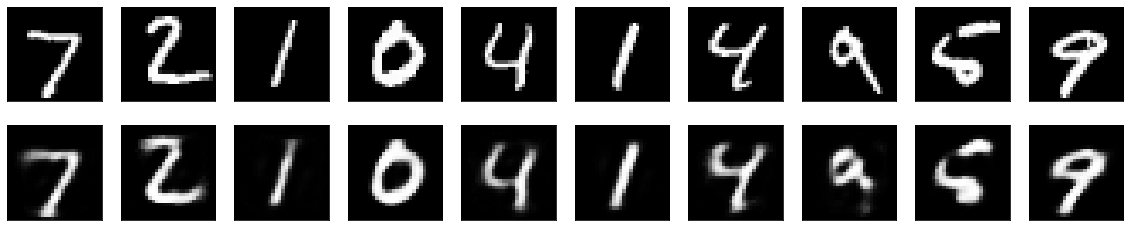

In [16]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [18]:
encoded_imgs.mean() 

7.47867

# Sparse Autoencoders using Keras

https://blog.keras.io/building-autoencoders-in-keras.html

In [20]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-8))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.3662 - val_loss: 0.2734
Epoch 2/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.2668 - val_loss: 0.2568
Epoch 3/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.2464 - val_loss: 0.2342
Epoch 4/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.2266 - val_loss: 0.2170
Epoch 5/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.2119 - val_loss: 0.2043
Epoch 6/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.2008 - val_loss: 0.1947
Epoch 7/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.1921 - val_loss: 0.1869
Epoch 8/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.1851 - val_loss: 0.1806
Epoch 9/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.179

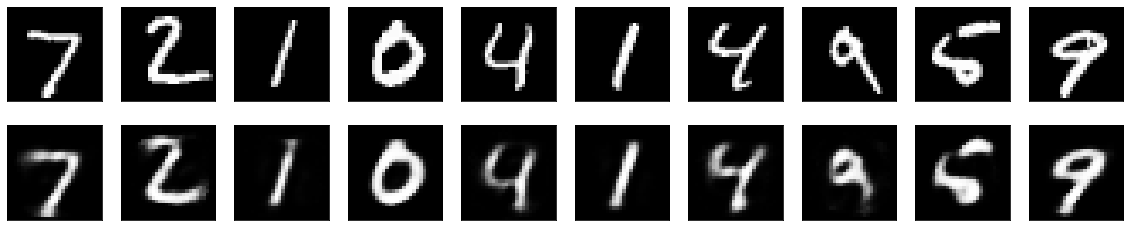

5.1701016

In [21]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist
import numpy as np
import os
(x_train, y_train), (x_test, y_test) = mnist.load_data(path=os.getcwd()+"/mnist.npz")
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
autoencoder.fit(x_train, x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test, x_test))
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
encoded_imgs.mean() 

Note that encoded_imgs.mean()  shows us that sparse encoders lead to a much sparser representation of images getting learned.

# Deep auto encoder using Keras

https://blog.keras.io/building-autoencoders-in-keras.html

In [22]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 125us/step - loss: 0.3395 - val_loss: 0.2641
Epoch 2/100
60000/60000 [==============================] - 7s 111us/step - loss: 0.2572 - val_loss: 0.2497
Epoch 3/100
60000/60000 [==============================] - 7s 110us/step - loss: 0.2340 - val_loss: 0.2187
Epoch 4/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.2143 - val_loss: 0.2096
Epoch 5/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.2059 - val_loss: 0.2010
Epoch 6/100
60000/60000 [==============================] - 6s 106us/step - loss: 0.1953 - val_loss: 0.1905
Epoch 7/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.1861 - val_loss: 0.1804
Epoch 8/100
60000/60000 [==============================] - 6s 108us/step - loss: 0.1771 - val_loss: 0.1724
Epoch 9/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.1712 - val_

Epoch 77/100
60000/60000 [==============================] - 6s 105us/step - loss: 0.1028 - val_loss: 0.1012
Epoch 78/100
60000/60000 [==============================] - 7s 115us/step - loss: 0.1027 - val_loss: 0.0999
Epoch 79/100
60000/60000 [==============================] - 7s 109us/step - loss: 0.1023 - val_loss: 0.1007
Epoch 80/100
60000/60000 [==============================] - 6s 107us/step - loss: 0.1021 - val_loss: 0.1008
Epoch 81/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.1019 - val_loss: 0.1006
Epoch 82/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.1017 - val_loss: 0.1014
Epoch 83/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.1014 - val_loss: 0.0993
Epoch 84/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.1012 - val_loss: 0.1008
Epoch 85/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.1011 - val_loss: 0.1003
Epoch 86/100
60000/60000 [==

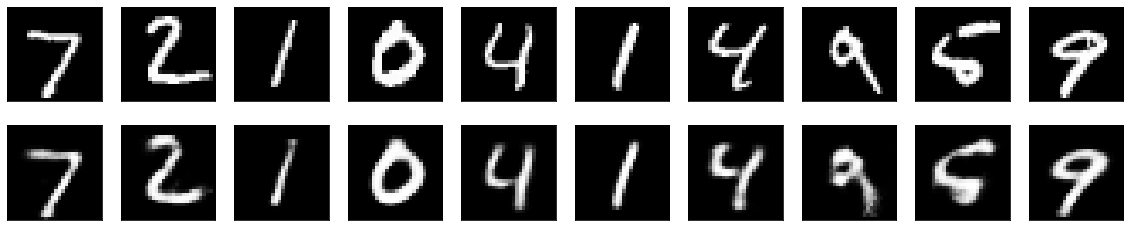

5.4027267

In [26]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
# retrieve the layers of the autoencoder model
decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
encoded_imgs.mean() 

# Image Denoising using a convolutional auto-encoder in Keras

https://blog.keras.io/building-autoencoders-in-keras.html

Here's how we will generate synthetic noisy digits: we just apply a gaussian noise matrix and clip the images between 0 and 1.

In [27]:
from keras.datasets import mnist
import numpy as np

import os
(x_train, y_train), (x_test, y_test) = mnist.load_data(path=os.getcwd()+"/mnist.npz")

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

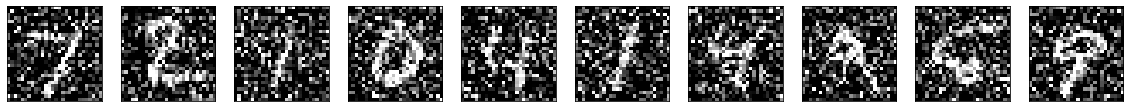

In [30]:
#Here's what the noisy digits look like:

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [31]:
#convolutional auto-encoder
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [33]:
from keras.callbacks import TensorBoard
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='logs/', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 254s 4ms/step - loss: 0.1789 - val_loss: 0.1229
Epoch 2/100
60000/60000 [==============================] - 243s 4ms/step - loss: 0.1177 - val_loss: 0.1110
Epoch 3/100
60000/60000 [==============================] - 250s 4ms/step - loss: 0.1107 - val_loss: 0.1061
Epoch 4/100
60000/60000 [==============================] - 246s 4ms/step - loss: 0.1074 - val_loss: 0.1045
Epoch 5/100
60000/60000 [==============================] - 249s 4ms/step - loss: 0.1056 - val_loss: 0.1044
Epoch 6/100
60000/60000 [==============================] - 254s 4ms/step - loss: 0.1039 - val_loss: 0.1042
Epoch 7/100
60000/60000 [==============================] - 244s 4ms/step - loss: 0.1030 - val_loss: 0.1004
Epoch 8/100
60000/60000 [==============================] - 247s 4ms/step - loss: 0.1020 - val_loss: 0.0997
Epoch 9/100
60000/60000 [==============================] - 245s 4ms/step - loss: 0.1014 - val_

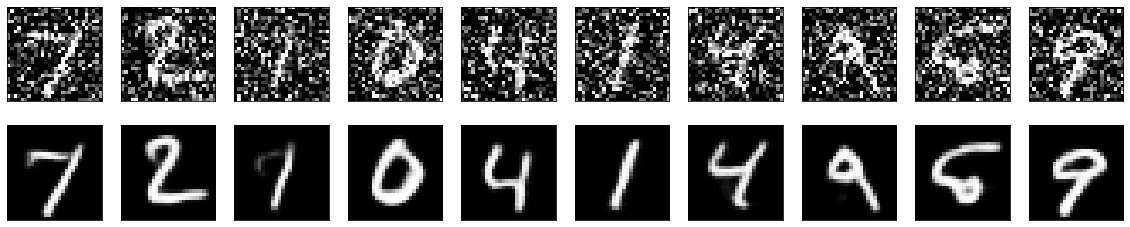

In [37]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()